### <p style="background-color:blue; font-family:calibri; font-size:120%; text-align:center" id="data"> Modelo LSTM Multivariado para projetar  o volume de movimentações finacerieiras do clinte de varios com base no seu historico vindo do open finance</p>

**Álex Junio**

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt

#geração de seeds dados o evento
tf.random.set_seed(123)
np.random.seed(123)

In [95]:
df = pd.read_csv("./raw/Finance__Traffic_Volume (2).csv")

In [96]:
df.head()

,defaulter,feeAmount,risk_1,risk_2,paidInstalments,productType,chargeType,paidDate,contractAmount
0,None,288.28,0.0,0.0,40,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS,2022-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS_RURAIS,2022-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS,2022-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS,2022-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS_RURAIS,2022-10-02 13:00:00,4918


In [56]:
df.describe()

,feeAmount,risk_1,risk_2,paidInstalments,contractAmount
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [97]:
df.drop_duplicates(subset=['paidDate'], keep=False,inplace=True)
df.astype({'feeAmount': 'float'}).dtypes

defaulter           object
feeAmount          float64
risk_1             float64
risk_2             float64
paidInstalments      int64
productType         object
chargeType          object
paidDate            object
contractAmount       int64
dtype: object

In [45]:
df.head()

,defaulter,feeAmount,paidInstalments,productType,chargeType,paidDate,contractAmount
0,None,288.28,40,FINANCIAMENTOS_RURAIS,JUROS_REMUNERATORIOS_POR_ATRASO,02/10/2012 09:00,5545
1,None,289.36,75,FINANCIAMENTOS_RURAIS,JUROS_REMUNERATORIOS_POR_ATRASO,02/10/2012 10:00,4516
2,None,289.58,90,FINANCIAMENTOS_RURAIS,JUROS_REMUNERATORIOS_POR_ATRASO,02/10/2012 11:00,4767
3,None,290.13,90,FINANCIAMENTOS_RURAIS,JUROS_REMUNERATORIOS_POR_ATRASO,02/10/2012 12:00,5026
4,None,291.14,75,FINANCIAMENTOS_RURAIS,JUROS_REMUNERATORIOS_POR_ATRASO,02/10/2012 13:00,4918


In [98]:
holiday_le = preprocessing.LabelEncoder()
df['defaulter_le'] = holiday_le.fit_transform(df['defaulter']) 
weather_main_le = preprocessing.LabelEncoder()
df['productType_le'] = weather_main_le.fit_transform(df['productType']) 
weather_description_le = preprocessing.LabelEncoder()
df['chargeType_le'] = weather_description_le.fit_transform(df['chargeType']) 

In [99]:
df.head()

,defaulter,feeAmount,risk_1,risk_2,paidInstalments,productType,chargeType,paidDate,contractAmount,defaulter_le,productType_le,chargeType_le
0,None,288.28,0.0,0.0,40,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS,2022-10-02 09:00:00,5545,7,4,0
1,None,289.36,0.0,0.0,75,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS_RURAIS,2022-10-02 10:00:00,4516,7,4,2
2,None,289.58,0.0,0.0,90,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS,2022-10-02 11:00:00,4767,7,4,0
3,None,290.13,0.0,0.0,90,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS,2022-10-02 12:00:00,5026,7,4,0
4,None,291.14,0.0,0.0,75,FINANCIAMENTOS_RURAIS,FINANCIAMENTOS_RURAIS,2022-10-02 13:00:00,4918,7,4,2


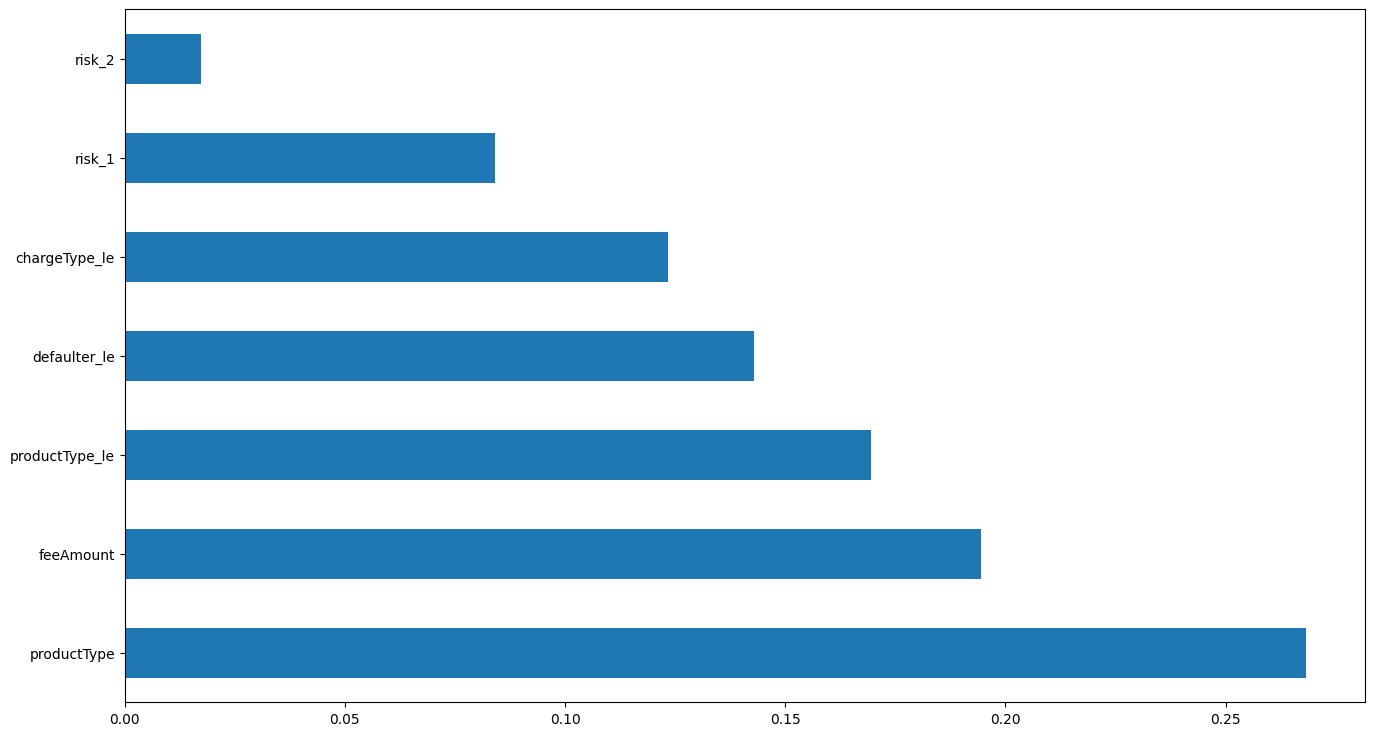

In [101]:
#criado de plot do regressor dos dados para a validação
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot

model = XGBRegressor()
model.fit(df[['feeAmount', 'risk_1', 'risk_2', 'paidInstalments', 'defaulter_le',
    'productType_le', 'chargeType_le']],df[['contractAmount']])

(pd.Series(model.feature_importances_, index=df[['feeAmount', 'risk_1', 'risk_2', 'productType', 'defaulter_le',
    'productType_le', 'chargeType_le']].columns)
   .nlargest(7)
   .plot(kind='barh'));

In [63]:
df = df[['risk_2','feeAmount', 'risk_1', 'paidInstalments', 'defaulter_le',
    'productType_le', 'chargeType_le','contractAmount']]

In [64]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [65]:
validate = df[['risk_1','feeAmount', 'risk_2', 'paidInstalments', 'defaulter_le',
    'productType_le', 'chargeType_le','contractAmount']].tail(10)
df.drop(df.tail(10).index,inplace=True)

In [74]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()
dataX = x_scaler.fit_transform(df[['risk_1','feeAmount', 'risk_2', 'paidInstalments', 'defaulter_le',
    'productType_le', 'chargeType_le','contractAmount']])
dataY = y_scaler.fit_transform(df[['contractAmount']])

In [75]:
hist_window = 48
horizon = 10
TRAIN_SPLIT = 30000
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)

In [76]:
print ('verificação única da historia')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])

verificação única da historia
[[0.         0.92972555 0.         0.4        0.63636364 0.1
  0.7        0.76167582]
 [0.         0.93320863 0.         0.75       0.63636364 0.1
  0.06666667 0.62032967]
 [0.         0.93391815 0.         0.9        0.63636364 0.1
  0.56666667 0.65480769]
 [0.         0.93569194 0.         0.9        0.63636364 0.1
  0.56666667 0.69038462]
 [0.         0.93894927 0.         0.75       0.63636364 0.1
  0.06666667 0.67554945]
 [0.         0.94081981 0.         0.01       0.63636364 0.
  0.73333333 0.71167582]
 [0.         0.94549618 0.         0.01       0.63636364 0.
  0.73333333 0.76703297]
 [0.         0.94772148 0.         0.01       0.63636364 0.
  0.73333333 0.82623626]
 [0.         0.9486245  0.         0.2        0.63636364 0.1
  0.13333333 0.79546703]
 [0.         0.94527042 0.         0.2        0.63636364 0.1
  0.13333333 0.65521978]
 [0.         0.93840101 0.         0.2        0.63636364 0.1
  0.13333333 0.48612637]
 [0.         0.93327313 0. 

In [77]:
BATCH_SIZE = 256
BUFFER_SIZE = 150

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [78]:
lstm_multi = tf.keras.models.Sequential()
lstm_multi.add(tf.keras.layers.LSTM(150,input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(tf.keras.layers.Dropout(0.2)),
lstm_multi.add(tf.keras.layers.LSTM(units=100,return_sequences=False)),
lstm_multi.add(tf.keras.layers.Dropout(0.2)),
lstm_multi.add(tf.keras.layers.Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [79]:
model_path = "LSTM_Multivariate.h5"

In [ ]:
#criação do modelo de intervalo
EVALUATION_INTERVAL = 150
EPOCHS = 100
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi, validation_steps=50,verbose =1,
                              callbacks =[tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])

In [81]:
Trained_model = tf.keras.models.load_model(model_path)

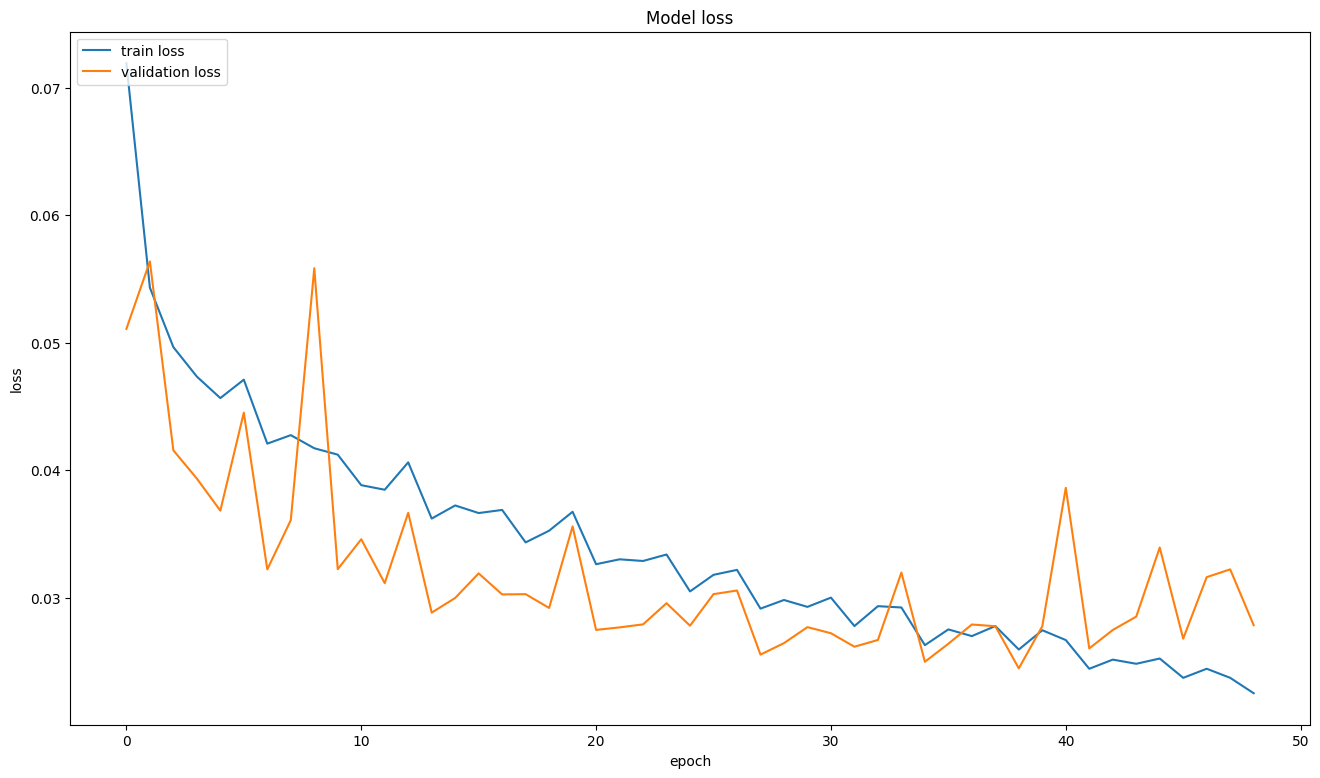

In [82]:
#plot de validação das perdas do modelo

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [83]:
# Show the model architecture
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48, 150)           95400     
                                                                 
 dropout (Dropout)           (None, 48, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               100400    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 196,810
Trainable params: 196,810
Non-trainable params: 0
_________________________________________________________________


In [85]:
data_val = x_scaler.fit_transform(df[['risk_1','feeAmount', 'risk_2', 'paidInstalments', 'defaulter_le',
    'productType_le', 'chargeType_le','contractAmount']].tail(48))

In [86]:
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [87]:
Predicted_results = Trained_model.predict(val_rescaled)

1/1 [==============================] - 1s 801ms/step


In [88]:
Predicted_results

array([[0.68575674, 0.6711254 , 0.65158176, 0.6224625 , 0.5810363 ,
        0.53771293, 0.49383527, 0.44111472, 0.38800108, 0.33842278]],
      dtype=float32)

In [33]:
Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results)

In [89]:
Predicted_results_Inv_trans

array([[4992.309 , 4885.793 , 4743.515 , 4531.527 , 4229.9443, 3914.55  ,
        3595.1208, 3211.3152, 2824.648 , 2463.7178]], dtype=float32)

In [90]:
from sklearn import metrics
def timeseries_evaluacion_metricas_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [94]:
timeseries_evaluacion_metricas_func(validate['contractAmount'],Predicted_results_Inv_trans[0])

Evaluation metric results:-
MSE is : 696096.5380210101
MAE is : 716.7440185546875
RMSE is : 834.3240006262615
MAPE is : 38.93161859892583
R2 is : 0.5480836499175286



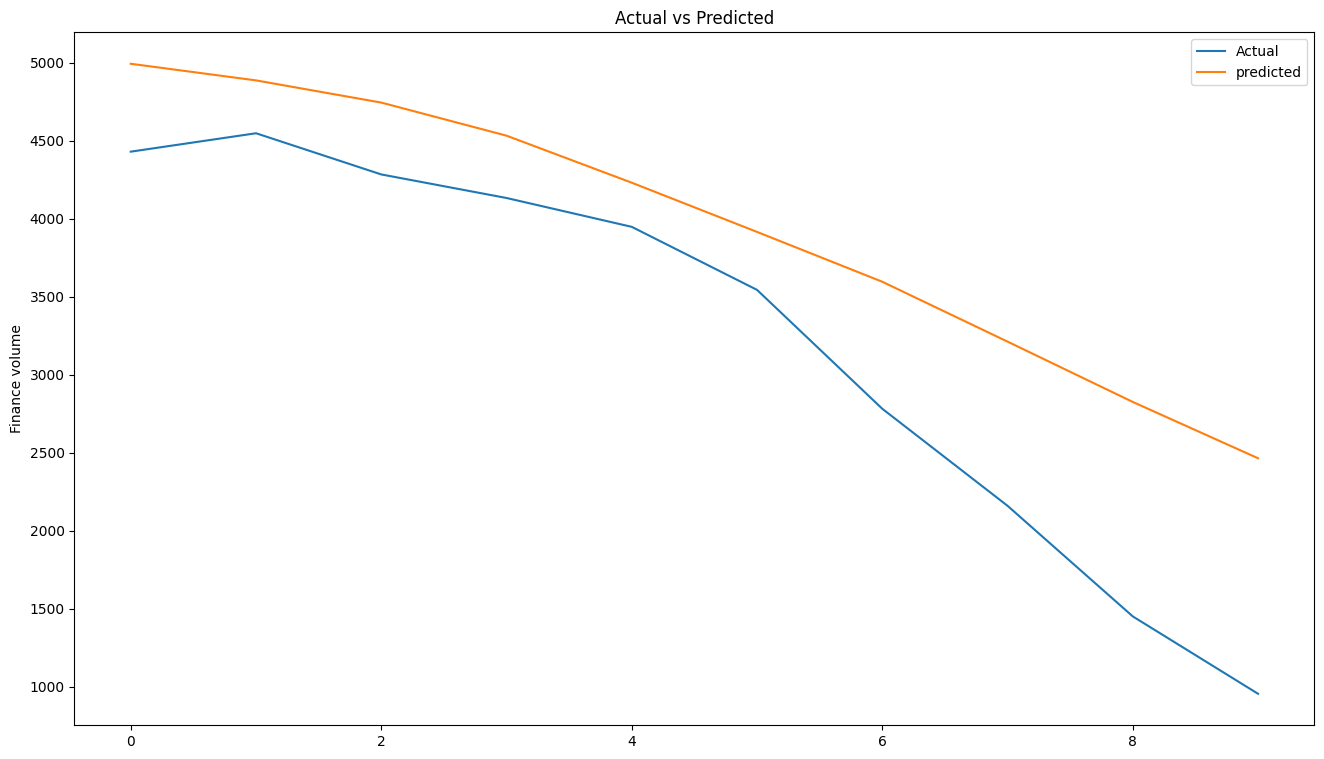

In [93]:
#Geraçao da serie temporal do preditor 

plt.plot( list(validate['contractAmount']))
plt.plot( list(Predicted_results_Inv_trans[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Finance volume")
plt.legend(('Actual','predicted'))
plt.show()